In [7]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic") # 한글표시 (window)
# plt.rc("font", family="Malgun Gothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

import seaborn as sns
print('seaborn', sns.__version__)

import folium 
print('folium', folium.__version__)
# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39

# # 경고 메시지는 출력되지 않게 합니다.
# import warnings
# warnings.filterwarnings("ignore")

python 3.10.17 (main, Apr  8 2025, 12:10:59) [Clang 17.0.0 (clang-1700.0.13.3)]
numpy 1.26.4
pandas 2.2.3
matplotlib 3.10.0
seaborn 0.13.2
folium 0.19.6


* ========================================
* 전국도시공원데이터
* ========================================

# 전처리 전체 코드

In [4]:
df_ori = pd.read_csv("data/전국도시공원표준데이터.csv", encoding="cp949")
df_ori.shape
df_ori.sample(2)

############ step1) info() 확인 후 안쓰는 column (Unnamed: 19) 제거하기
df1=df_ori.drop(columns='Unnamed: 19', errors='ignore')

############ step2) 위도, 경도 scatter plot 후 outlier 제거하기
df2 = df1.loc[(df1["경도"] < 132) & (df1["위도"] > 32)].copy()

############ step3) '소재지지번주소' 정보를 처리해서 '시도' column 만들기
df3=df2.loc[df2['소재지지번주소'].notnull()].copy()
df3['시도']=df3["소재지지번주소"].map(lambda x: x.split(' ')[0])
df3['구']=df3["소재지지번주소"].map(lambda x: x.split(' ')[1])

############ step4) 추후 실습에 필요한 column만 선택
df_fin=df3.copy()

############ step5) 오타수정
df_fin['시도']=df_fin['시도'].replace({'강원':'강원도'})
df_fin.head(2)
df_fin['시도'].value_counts()

(18137, 20)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
17465,45710-00049,참사랑공원,소공원,전라북도 완주군 삼례읍 삼례리 1689-19,NaN,35.911669,127.077492,4459.0,NaN,NaN,NaN,NaN,NaN,2012-07-20,NaN,NaN,2019-06-25,6450000,전라북도,NaN
13301,41360-00051,마석물놀이장,어린이공원,NaN,경기도 남양주시 화도읍 마석우리 568,37.655703,127.299546,1610.0,NaN,NaN,NaN,NaN,NaN,NaN,경기도 남양주시청,031-590-8601,2020-01-23,3990000,경기도 남양주시,NaN


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구


시도
경기도        3317
경상남도       1823
전라남도       1733
서울특별시      1701
충청남도       1588
경상북도        917
충청북도        898
울산광역시       885
전라북도        790
강원도         648
부산광역시       647
인천광역시       579
대전광역시       497
대구광역시       459
광주광역시       428
제주특별자치도     246
Name: count, dtype: int64

# 실습1) 경기도와 서울특별시의 2000년 이후에 지정된 공원에 대하여 
* 1) 지정 연도별 공원의 개수
  2) 지정 연도별 누적 공원의 개수를 bar graph로 나타내시오
* 지정연도에 대한 정보는 지정고시일에 있음

'############ axs[0] 지정 연도별 공원의 개수'

<Axes: xlabel='연도', ylabel='count'>

'############ axs[1] 지정 연도별 공원의 누적 개수'

<Axes: xlabel='연도', ylabel='개수'>

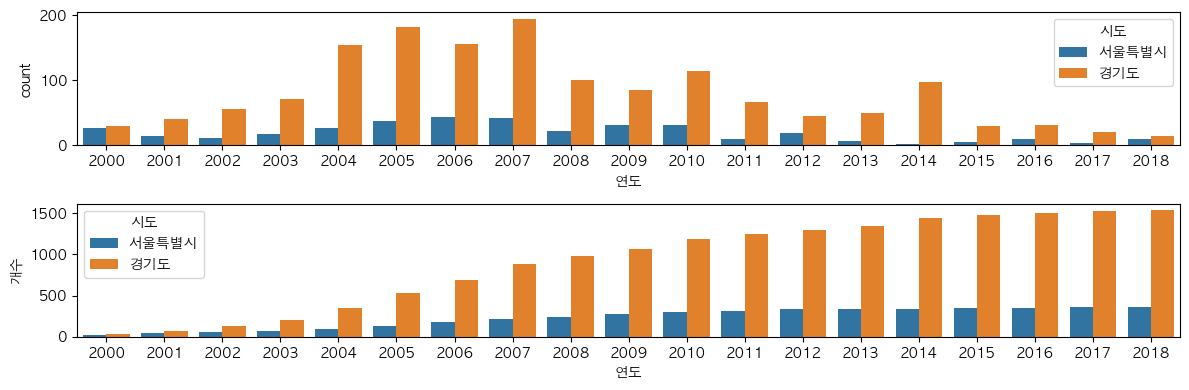

In [18]:
###
fig=plt.figure(figsize=(12, 4), dpi=100)
axs=fig.subplots(2,1)

## 시도 처리
df_fin2=df_fin.copy()
df_fin2=df_fin2.loc[df_fin2['시도'].isin(['경기도','서울특별시'])]

## 연도 처리
df_fin2=df_fin2[df_fin2['지정고시일'].notnull()]
df_fin2['연도'] = df_fin2['지정고시일'].map(lambda x: int(x.split('-')[0]))

df_fin2 = df_fin2.loc[df_fin2['연도']>=2000]

'############ axs[0] 지정 연도별 공원의 개수'
sns.countplot(data=df_fin2, x='연도', hue='시도', ax=axs[0])

'############ axs[1] 지정 연도별 공원의 누적 개수'
df_cumsum = df_fin2[['시도','연도']].value_counts().unstack(0).cumsum()
df_cumsum.reset_index(inplace=True)
df_melt = df_cumsum.melt(id_vars='연도', value_vars=['서울특별시', '경기도'], value_name='개수')
sns.barplot(data=df_melt, x='연도', hue='시도', y='개수', ax=axs[1])

fig.tight_layout()

# 실습2) 서울특별시의 각 구 별로 가장 넓은 공원 folium으로 지도상에 나타내기
* 단, 마커를 Marker와 circle로 나타내고, 넓이를 circle의 크기에 반영하시오

In [19]:
df_fin.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구


In [7]:
df1=df_fin.loc[df_fin['시도']=='서울특별시', ['공원명','구','위도','경도','공원면적']]

# 구별로 면적이 가장 큰 공원 구하기


#####
lat = df3["위도"].mean()
long = df3["경도"].mean()
m = folium.Map([lat, long], zoom_start=11)


for i in df3.index:
    ## 구별로 면적이 가장 큰 공원 지도에 
    # 1) marker로 표시
    # 2) 공원면적 반지름 만큼 circle로 표시    
m


,구,공원명,공원면적,위도,경도
0,강남구,광평공원,519782.00,37.485867,127.083389
1,강동구,명일공원,649709.60,37.551258,127.163395
2,강북구,오동근린공원,1346557.00,37.629232,127.033042
3,강서구,봉제산,917190.00,37.539906,126.849750
4,관악구,장군봉근린공원,128100.00,37.478631,126.939048
5,광진구,구의공원,10464.00,37.536939,127.085825
6,구로구,온수도시자연공원,1097565.00,37.571952,126.963169
7,금천구,금천체육공원,18083.00,37.468233,126.908522
8,노원구,수락산공원,6692795.00,37.691921,127.065599
9,도봉구,북한산 국립공원,8703000.00,37.692080,127.031204


# 실습3) 주어진 지하철역에서 가장 가까운 서울 내의 공원을 folium 지도에 나타내시오
* 지하철역은 초록색 icon, 가장 가까운 공원은 빨간색 icon으로 나타내시오
* 해당 지하철역과 공원을 선으로 연결하고, 거리를 표시하시오

In [13]:
%pip install haversine
from haversine import haversine

Note: you may need to restart the kernel to use updated packages.


In [15]:
## 입력: taget 지하철역
station='시청'

## 서울시 공원 데이터만 가져오기


## 지하철역 데이터 load 후 해당 지하철역 위도, 경도 가져오기


## df_park에 거리 추가하기
# 거리 구하는 함수 정의
def get_distance(row):
    p_lat=row['위도']
    p_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

# apply활용


## 거리가 가장 짧은 공원의 이름, 위도, 경도, 거리 구하기

## map 생성
m = folium.Map([s_lat, s_long], zoom_start=15)

## 지하철역 marekr 추가

## 공원 marekr 추가

## 공원과 지하철 연결하는 선 추가

## map 확인
m

,공원명,공원구분,위도,경도
213,가락,근린공원,37.498469,127.125124
214,개나리,근린공원,37.507553,127.094089
215,개롱,근린공원,37.493407,127.130026


# 실습4) 주어진 "여러개의 지하철역들"에서 각 역에서 가장 가까운 서울 내의 공원을 folium 지도에 나타내시오
* 지하철역은 초록색 icon, 가장 가까운 공원은 빨간색 icon으로 나타내시오
* 해당 지하철역과 공원을 선으로 연결하고, 거리를 표시하시오

In [17]:
#%pip install haversine
from haversine import haversine

Note: you may need to restart the kernel to use updated packages.


In [19]:
def processing_function(station):
    ##코드작성 

station_list=['시청','대림', '건대입구', '신도림']

## map 중심 찾기 (주어진 역들의 중심 위치)
df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
center_lat, center_long=df_station.loc[df_station['역명'].isin(station_list), ['위도','경도']].mean(axis=0)

## map 생성
m = folium.Map([center_lat, center_long], zoom_start=12)

## 주어진 역들에 대해서 for loop 수행
for station in station_list:
    s_lat, s_long, park, park_type,p_lat, p_long, dist = processing_function(station)
    
    s_lat, s_long, park, park_type, p_lat, p_long, dist
    
    ## 지하철역 marekr 추가
    _=folium.Marker([s_lat, s_long], tooltip='역:'+station, icon=folium.Icon(color="green")).add_to(m)
    ## 공원 marekr 추가
    _=folium.Marker([p_lat, p_long], tooltip='공원:{} ({})'.format(park, park_type), icon=folium.Icon(color="red")).add_to(m)
    
    ## 공원과 지하철 연결하는 선 추가
    _=folium.PolyLine(locations=[[s_lat, s_long],[p_lat, p_long]], tooltip='{:.2f}km'.format(dist), weight=10).add_to(m)
m

(37.56359,
 126.975407,
 '배재공원',
 '어린이공원',
 37.564224,
 126.972182,
 0.2928676539693744)

(37.492426,
 126.895293,
 '다사랑어린이공원',
 '어린이공원',
 37.492792,
 126.899215,
 0.3484063706602826)

(37.540408,
 127.069231,
 '장독골공원',
 '어린이공원',
 37.535642,
 127.06906,
 0.5301701878421932)

(37.508815,
 126.891222,
 '신도림역문화공원',
 '문화공원',
 37.508432,
 126.888733,
 0.22363916745229673)

# 실습5) 지하철역과 거리(km)가 주어졌을 때, 지하철역으로부터 해당 거리 안에 있는 베스킨라빈스와 던킨도너츠 상점을 표시하시오

In [21]:
df_seoul=pd.read_csv('data/상권정보_서울_202403_18cols.csv', sep=',')
df_31 = df_seoul.loc[df_seoul["상호명"].str.contains('배스킨라빈스|베스킨라빈스|던킨')].copy()
df_31 = df_31.loc[df_31["상권업종대분류명"]=='음식',['상호명','위도','경도']]
df_31.head(1)
df_31.shape

,상호명,위도,경도
1970,비알배스킨라빈스한남HIVE,37.535004,127.010579


(395, 3)

In [23]:
## 입력: taget 지하철역
station='시청'
dst_th=1 # 단위: km

## 지하철역 데이터 load 후 해당 지하철역 위도, 경도 가져오기
df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
station_latlong=df_station.loc[df_station['역명']==station, ['위도','경도']]
s_lat, s_long=station_latlong.iloc[0]

## df_31에 거리 추가하기
# 거리 구하는 함수 정의
def get_distance(row):
    p_lat=row['위도']
    p_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

# apply활용


## dst_th안에 있는 상점 구하기

## map 생성
m = folium.Map([s_lat, s_long], zoom_start=15)
## 지하철역 marekr & cicle 추가


## 상점 marker 추가
for ind in df_31_selected.index:
    ## 코드작성
    
## map 확인
m

,상호명,위도,경도,거리
30320,명성인터내셔널던킨,37.561614,126.974957,0.223227
140933,비알던킨도너츠CF연세세브란스빌딩점,37.557088,126.973616,0.739974
179007,비알배스킨라빈스광화문,37.570610,126.980539,0.902197
202637,던킨도너츠,37.563666,126.977770,0.208480
429241,비알배스킨라빈스시청역,37.564319,126.976177,0.105712


# Choropleth 사용하여 서울시 구 별 공원수 색깔로 표현하기

In [25]:
import json
f1=open('data/seoul_municipalities_geo_simple.json','r',encoding="utf-8")
f1
geo_json=json.load(f1)
type(geo_json)
type(geo_json['features'])
len(geo_json['features'])
geo_json['features'][0]
geo_json['features'][0].keys()

<_io.TextIOWrapper name='data/seoul_municipalities_geo_simple.json' mode='r' encoding='utf-8'>

dict

list

25

{'type': 'Feature',
 'properties': {'code': '11250',
  'name': '강동구',
  'name_eng': 'Gangdong-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.11519584981606, 37.557533180704915],
    [127.11879551821994, 37.557222485451305],
    [127.12146867175024, 37.55986003393365],
    [127.12435254630417, 37.56144246249796],
    [127.13593925898998, 37.56564793048277],
    [127.14930548011061, 37.56892250303897],
    [127.15511020940411, 37.57093642128295],
    [127.16683184366129, 37.57672487388627],
    [127.17038810813094, 37.576465605301046],
    [127.17607118428914, 37.57678573961056],
    [127.17905504160184, 37.57791388161732],
    [127.17747787800164, 37.57448983055031],
    [127.1781775408844, 37.571481967974336],
    [127.17995281860672, 37.569309661290504],
    [127.18122821955262, 37.56636089217979],
    [127.18169407550688, 37.56286338914073],
    [127.18408792330152, 37.55814280369575],
    [127.18350810324185, 37.550053002101485],
    [127.18526

dict_keys(['type', 'properties', 'geometry'])

In [27]:
## 시도 처리
df1=df_fin.copy()
df1['구']=df1['소재지지번주소'].str.split(' ',expand=True)[1]
df1
seoul_gu_count=df1.loc[df1['시도']=='서울특별시','구'].value_counts()
seoul_gu_count
df1.loc[df1['시도']=='서울특별시','구'].value_counts()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,28140-00009,송림4공원,어린이공원,NaN,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,NaN,야외무대,NaN,NaN,"조형파고라, 앉음벽",1998-07-20,인천광역시 동구청,032-770-6205,2019-07-30,3500000,인천광역시 동구,인천광역시,동구
18133,47760-00002,서부공원,근린공원,NaN,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,NaN,NaN,화장실,NaN,NaN,1973-03-02,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군,경상북도,영양군
18134,47760-00003,입암공원,근린공원,NaN,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,NaN,NaN,NaN,NaN,NaN,1977-06-29,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군,경상북도,영양군
18135,47760-00004,수비공원,근린공원,NaN,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,NaN,NaN,NaN,NaN,NaN,1978-02-14,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군,경상북도,영양군


구
송파구     158
강서구     139
강남구     134
노원구     118
서초구     114
은평구      98
양천구      94
마포구      80
관악구      76
강동구      74
도봉구      71
중랑구      54
서대문구     52
금천구      51
동작구      51
성동구      48
구로구      47
강북구      45
동대문구     43
용산구      42
영등포구     42
광진구      38
중구       32
Name: count, dtype: int64

In [29]:
import folium

m = folium.Map([37.5441, 126.9905], tiles='Cartodb Positron', zoom_start=11)

folium.Choropleth(
    data=seoul_gu_count,
    geo_data=geo_json,
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='공원수'
).add_to(m)

m

# ======== 실습풀이

# 실습1) 경기도와 서울특별시의 2000년 이후에 지정된 공원에 대하여 
* 1) 지정 연도별 공원의 개수
  2) 지정 연도별 누적 공원의 개수를 bar graph로 나타내시오
* 지정연도에 대한 정보는 지정고시일에 있음

'############ axs[0] 지정 연도별 공원의 개수'

,시도,연도
371,서울특별시,2000
372,서울특별시,2006
373,서울특별시,2000


'############ axs[1] 지정 연도별 공원의 누적 개수'

시도,경기도,서울특별시
연도,,
2000,29,27
2001,41,15
2002,56,12


시도,경기도,서울특별시
연도,,
2000,29,27
2001,70,42
2002,126,54


,연도,시도,개수
0,2000,경기도,29
1,2001,경기도,70
2,2002,경기도,126


<Axes: xlabel='연도', ylabel='개수'>

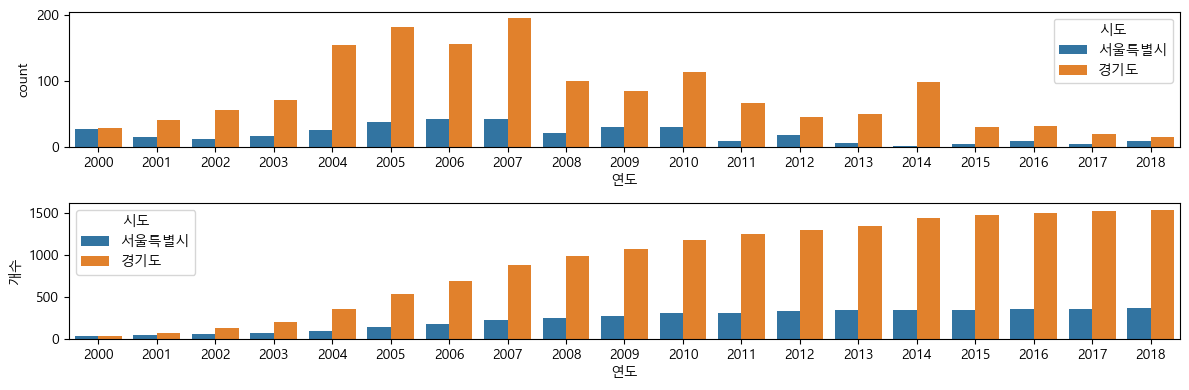

In [5]:
###
fig=plt.figure(figsize=(12, 4), dpi=100)
axs=fig.subplots(2,1)

## 시도 처리
df1=df_fin.loc[df_fin['시도'].isin(['경기도','서울특별시'])].copy()

## 연도 처리
df2=df1.loc[df1['지정고시일'].notnull()].copy()
df2['연도']=df2['지정고시일'].map(lambda x: int(x.split('-')[0]))
df3=df2.loc[df2['연도']>=2000, ['시도','연도']]

'############ axs[0] 지정 연도별 공원의 개수'
df3.head(3)
_=sns.countplot(data=df3, x='연도', hue='시도', ax=axs[0])

'############ axs[1] 지정 연도별 공원의 누적 개수'
df4=df3.value_counts().unstack(0)
df4.head(3)
df5_cumsum=df4.cumsum()
df5_cumsum.head(3)


df6=df5_cumsum.reset_index().melt(id_vars='연도', var_name='시도', value_name='개수')
df6.head(3)
sns.barplot(data=df6, x='연도', y='개수', hue='시도', hue_order=['서울특별시','경기도'], ax=axs[1])

fig.tight_layout()

# 실습2) 서울특별시의 각 구 별로 가장 넓은 공원 folium으로 지도상에 나타내기
* 단, 마커를 Marker와 circle로 나타내고, 넓이를 circle의 크기에 반영하시오

In [7]:
df1=df_fin.loc[df_fin['시도']=='서울특별시', ['공원명','구','위도','경도','공원면적']]

# 구별로 면적이 가장 큰 공원 구하기
idx = df1.groupby('구')['공원면적'].idxmax()
df3 = df1.loc[idx, ['구', '공원명', '공원면적', '위도', '경도']].reset_index(drop=True)
df3

#####
lat = df3["위도"].mean()
long = df3["경도"].mean()
m = folium.Map([lat, long], zoom_start=11)

## 구별로 면적이 가장 큰 공원 지도에 
# 1) marker로 표시
# 2) 공원면적 반지름 만큼 circle로 표시

for i in df3.index:
    [name, gu, area, lat, long]=df3.loc[i, ['공원명', '구', '공원면적','위도','경도']]
    t1='{}|{}|{}'.format(name, gu, int(area))
    r1=np.sqrt(area/np.pi)
    _=folium.Circle([lat, long], radius=r1, color='crimson', fill=True).add_to(m)# radius -> 반지름 단위(m)
    # cf)CircleMarker: radius-> 반지름 단위(pixel)
    _=folium.Marker([lat, long], tooltip=t1, icon=folium.Icon(color="blue")).add_to(m)
m


,구,공원명,공원면적,위도,경도
0,강남구,광평공원,519782.00,37.485867,127.083389
1,강동구,명일공원,649709.60,37.551258,127.163395
2,강북구,오동근린공원,1346557.00,37.629232,127.033042
3,강서구,봉제산,917190.00,37.539906,126.849750
4,관악구,장군봉근린공원,128100.00,37.478631,126.939048
5,광진구,구의공원,10464.00,37.536939,127.085825
6,구로구,온수도시자연공원,1097565.00,37.571952,126.963169
7,금천구,금천체육공원,18083.00,37.468233,126.908522
8,노원구,수락산공원,6692795.00,37.691921,127.065599
9,도봉구,북한산 국립공원,8703000.00,37.692080,127.031204


# 실습3) 주어진 지하철역에서 가장 가까운 서울 내의 공원을 folium 지도에 나타내시오
* 지하철역은 초록색 icon, 가장 가까운 공원은 빨간색 icon으로 나타내시오
* 해당 지하철역과 공원을 선으로 연결하고, 거리를 표시하시오

In [13]:
%pip install haversine
from haversine import haversine

Note: you may need to restart the kernel to use updated packages.


In [15]:
## 입력: taget 지하철역
station='시청'

## 서울시 공원 데이터만 가져오기
df_park=df_fin.loc[df_fin['시도']=='서울특별시',['공원명','공원구분','위도','경도']]
df_park.head(3)

## 지하철역 데이터 load 후 해당 지하철역 위도, 경도 가져오기
df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
station_latlong=df_station.loc[df_station['역명']==station, ['위도','경도']]
s_lat, s_long=station_latlong.iloc[0]

## df_park에 거리 추가하기
# 거리 구하는 함수 정의
def get_distance(row):
    p_lat=row['위도']
    p_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

# apply활용
df_park['거리']=df_park.apply(get_distance, axis=1)

## 거리가 가장 짧은 공원의 이름, 위도, 경도, 거리 구하기
park, park_type, p_lat, p_long, dist =df_park.sort_values(by='거리').iloc[0]

## map 생성
m = folium.Map([s_lat, s_long], zoom_start=15)

## 지하철역 marekr 추가
_=folium.Marker([s_lat, s_long], tooltip='역:'+station, icon=folium.Icon(color="green")).add_to(m)
## 공원 marekr 추가
_=folium.Marker([p_lat, p_long], tooltip='공원:{} ({})'.format(park, park_type), icon=folium.Icon(color="red")).add_to(m)
## 공원과 지하철 연결하는 선 추가
_=folium.PolyLine(locations=[[s_lat, s_long],[p_lat, p_long]], tooltip='{:.2f}km'.format(dist), weight=10).add_to(m)

## map 확인
m

,공원명,공원구분,위도,경도
213,가락,근린공원,37.498469,127.125124
214,개나리,근린공원,37.507553,127.094089
215,개롱,근린공원,37.493407,127.130026


# 실습4) 주어진 "여러개의 지하철역들"에서 각 역에서 가장 가까운 서울 내의 공원을 folium 지도에 나타내시오
* 지하철역은 초록색 icon, 가장 가까운 공원은 빨간색 icon으로 나타내시오
* 해당 지하철역과 공원을 선으로 연결하고, 거리를 표시하시오

In [17]:
#%pip install haversine
from haversine import haversine

Note: you may need to restart the kernel to use updated packages.


In [19]:
def processing_function(station):
    ## 서울시 공원 데이터만 가져오기
    df_park=df_fin.loc[df_fin['시도']=='서울특별시',['공원명','공원구분','위도','경도']]

    ## 지하철역 데이터 load 후 해당 지하철역 위도, 경도 가져오기
    df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
    station_latlong=df_station.loc[df_station['역명']==station, ['위도','경도']]
    s_lat, s_long=station_latlong.iloc[0]

    ## df_park에 거리 추가하기
    # 거리 구하는 함수 정의
    def get_distance(row):
        p_lat=row['위도']
        p_long=row['경도']
        return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

    # apply활용
    df_park['거리']=df_park.apply(get_distance, axis=1)

    ## 거리가 가장 짧은 공원의 이름, 위도, 경도, 거리 구하기
    park, park_type, p_lat, p_long, dist=df_park.sort_values(by='거리').iloc[0]
    
    return s_lat, s_long, park, park_type, p_lat, p_long, dist

station_list=['시청','대림', '건대입구', '신도림']

## map 중심 찾기 (주어진 역들의 중심 위치)
df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
center_lat, center_long=df_station.loc[df_station['역명'].isin(station_list), ['위도','경도']].mean(axis=0)

## map 생성
m = folium.Map([center_lat, center_long], zoom_start=12)

## 주어진 역들에 대해서 for loop 수행
for station in station_list:
    s_lat, s_long, park, park_type,p_lat, p_long, dist = processing_function(station)
    
    s_lat, s_long, park, park_type, p_lat, p_long, dist
    
    ## 지하철역 marekr 추가
    _=folium.Marker([s_lat, s_long], tooltip='역:'+station, icon=folium.Icon(color="green")).add_to(m)
    ## 공원 marekr 추가
    _=folium.Marker([p_lat, p_long], tooltip='공원:{} ({})'.format(park, park_type), icon=folium.Icon(color="red")).add_to(m)
    
    ## 공원과 지하철 연결하는 선 추가
    _=folium.PolyLine(locations=[[s_lat, s_long],[p_lat, p_long]], tooltip='{:.2f}km'.format(dist), weight=10).add_to(m)
m

(37.56359,
 126.975407,
 '배재공원',
 '어린이공원',
 37.564224,
 126.972182,
 0.2928676539693744)

(37.492426,
 126.895293,
 '다사랑어린이공원',
 '어린이공원',
 37.492792,
 126.899215,
 0.3484063706602826)

(37.540408,
 127.069231,
 '장독골공원',
 '어린이공원',
 37.535642,
 127.06906,
 0.5301701878421932)

(37.508815,
 126.891222,
 '신도림역문화공원',
 '문화공원',
 37.508432,
 126.888733,
 0.22363916745229673)

# 실습5) 지하철역과 거리(km)가 주어졌을 때, 지하철역으로부터 해당 거리 안에 있는 베스킨라빈스와 던킨도너츠 상점을 표시하시오

In [23]:
## 입력: taget 지하철역
station='시청'
dst_th=1 # 단위: km

## 지하철역 데이터 load 후 해당 지하철역 위도, 경도 가져오기
df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
station_latlong=df_station.loc[df_station['역명']==station, ['위도','경도']]
s_lat, s_long=station_latlong.iloc[0]

## df_31에 거리 추가하기
# 거리 구하는 함수 정의
def get_distance(row):
    p_lat=row['위도']
    p_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

# apply활용
df_31['거리']=df_31.apply(get_distance, axis=1)

## dst_th안에 있는 상점 구하기
df_31_selected=df_31.loc[df_31['거리']<=dst_th]
df_31_selected

## map 생성
m = folium.Map([s_lat, s_long], zoom_start=15)
## 지하철역 marekr & cicle 추가
_=folium.Marker([s_lat, s_long], tooltip='역:'+station, icon=folium.Icon(color="red")).add_to(m)
_=folium.Circle([s_lat, s_long], radius=dst_th*1000, color='blue', fill=True).add_to(m)# radius -> 반지름 단위(m)

## 상점 marker 추가
for ind in df_31_selected.index:
    shop, h_lat, h_long, dist=df_31_selected.loc[ind]
    
    ## 상점 marker 추가
    _=folium.Marker([h_lat, h_long], tooltip='상점: {}'.format(shop), icon=folium.Icon(color="green")).add_to(m)
    
## map 확인
m

,상호명,위도,경도,거리
30320,명성인터내셔널던킨,37.561614,126.974957,0.223227
140933,비알던킨도너츠CF연세세브란스빌딩점,37.557088,126.973616,0.739974
179007,비알배스킨라빈스광화문,37.570610,126.980539,0.902197
202637,던킨도너츠,37.563666,126.977770,0.208480
429241,비알배스킨라빈스시청역,37.564319,126.976177,0.105712
